In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

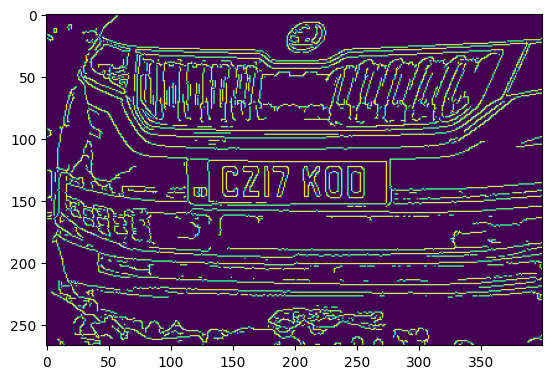

In [33]:
img = cv2.imread("/Cars102.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = cv2.bilateralFilter(gray_img, 11, 50, 50)
gray_img = cv2.equalizeHist(gray_img)
edge = cv2.Canny(gray_img, 50, 100)
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(edge, kernel, iterations=1)


plt.imshow(edge)


In [34]:
contours = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours

(array([[[216, 265]],
 
        [[216, 266]],
 
        [[221, 266]],
 
        [[221, 265]]], dtype=int32),
 array([[[232, 264]],
 
        [[231, 265]],
 
        [[231, 266]],
 
        [[238, 266]],
 
        [[238, 264]]], dtype=int32),
 array([[[330, 262]],
 
        [[328, 264]],
 
        [[328, 266]],
 
        [[336, 266]],
 
        [[336, 265]],
 
        [[337, 264]],
 
        [[338, 264]],
 
        [[339, 265]],
 
        [[340, 265]],
 
        [[341, 266]],
 
        [[345, 266]],
 
        [[345, 265]],
 
        [[344, 264]],
 
        [[343, 264]],
 
        [[342, 263]],
 
        [[341, 263]],
 
        [[340, 262]]], dtype=int32),
 array([[[  8, 261]],
 
        [[  8, 263]],
 
        [[ 10, 265]],
 
        [[ 10, 266]],
 
        [[ 15, 266]],
 
        [[ 15, 265]],
 
        [[ 14, 264]],
 
        [[ 14, 263]],
 
        [[ 12, 263]],
 
        [[ 11, 262]],
 
        [[ 11, 261]]], dtype=int32),
 array([[[266, 260]],
 
        [[263, 263]],
 
        [[26

In [35]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)
contours

[array([[[56,  0]],
 
        [[50,  6]],
 
        [[49,  6]],
 
        ...,
 
        [[53,  8]],
 
        [[58,  3]],
 
        [[58,  0]]], dtype=int32),
 array([[[133, 119]],
 
        [[161, 119]],
 
        [[162, 120]],
 
        [[272, 120]],
 
        [[273, 121]],
 
        [[273, 151]],
 
        [[272, 152]],
 
        [[196, 152]],
 
        [[195, 153]],
 
        [[179, 153]],
 
        [[178, 152]],
 
        [[178, 151]],
 
        [[168, 151]],
 
        [[168, 152]],
 
        [[167, 153]],
 
        [[166, 152]],
 
        [[166, 151]],
 
        [[139, 151]],
 
        [[138, 150]],
 
        [[133, 150]],
 
        [[132, 149]],
 
        [[132, 126]],
 
        [[131, 125]],
 
        [[131, 121]]], dtype=int32),
 array([[[115,  42]],
 
        [[116,  41]],
 
        [[117,  42]],
 
        [[117,  44]],
 
        [[122,  44]],
 
        [[122,  43]],
 
        [[123,  42]],
 
        [[125,  42]],
 
        [[126,  43]],
 
        [[126,  46]],
 
        [[1

In [36]:
plate_contour = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.06 * perimeter, True)
    if len(approx) == 4:
        plate_contour = approx
        break

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
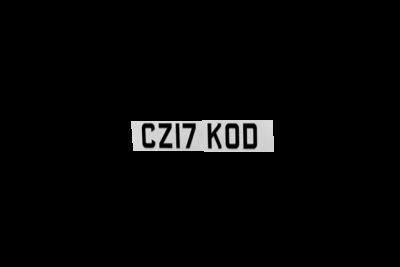

In [37]:
plate_contour
mask = np.zeros(gray_img.shape, np.uint8)
new_image = cv2.drawContours(mask, [plate_contour], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
new_image

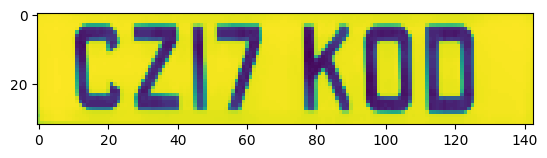

In [38]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray_img[x1:x2+1, y1:y2+1]

plt.imshow(cropped_image)

In [ ]:
!pip install easyocr
import easyocr

In [40]:
result = easyocr.Reader(['en']).readtext(cropped_image)
result

[([[8, 0], [132, 0], [132, 32], [8, 32]], 'Czi7 KOD', 0.8992312238752931)]

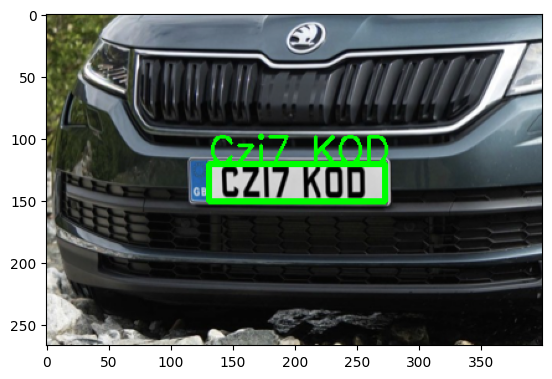

In [41]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=2)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(res)

In [ ]:
!pip install gradio

In [45]:
from typing import Literal
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr
import gradio as gr
from PIL import Image
import io

def detect_plate(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = cv2.bilateralFilter(gray_img, 11, 17, 17)
    gray_img = cv2.equalizeHist(gray_img)
    edge = cv2.Canny(gray_img, 10, 200)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edge, kernel, iterations=1)


    plt.imshow(edge)

    contours = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    plate_contour = None
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.06 * perimeter, True)
        if len(approx) == 4:
            plate_contour = approx
            break

    mask = np.zeros(gray_img.shape, np.uint8)
    new_image = cv2.drawContours(mask, [plate_contour], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    new_image

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2,y2) = (np.max(x), np.max(y))
    cropped_image = gray_img[x1:x2+1, y1:y2+1]

    plt.imshow(cropped_image)

    result = easyocr.Reader(['en']).readtext(cropped_image)
    if result:
        text = result[0][-2]
    else:
        "No License Plate Detected"

    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0]-120, approx[1][0][1]+80), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=2)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

    result_img = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
    return result_img, text


demo = gr.Interface(fn=detect_plate,
                         inputs=gr.Image(type="numpy", label="Insert your license plate image here"),
                         outputs=[gr.Image(type="numpy", label="Image Result"), gr.Textbox(label="Text Result")],
                         live=True,
                         description="License Plate Detection using EasyOCR",
                         allow_flagging= 'never',
                         theme=gr.themes.Ocean()
                    )

demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1b326bd487c9a7ea44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
